# loading_ViT.ipynb



In [154]:

# import torchvision.models
# from torchvision.models import resnet101
# from torchvision.models import swin_t

# model = resnet101
# model = torchvision.models.Swin_T_Weights
import torch
from torchvision.models import squeezenet1_0
from PIL import Image
from torchvision import transforms

filename = 'dog.jpg'
# filename = 'scuba.jpg'
# filename = 'fish.jfif'
input_image = Image.open(filename)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


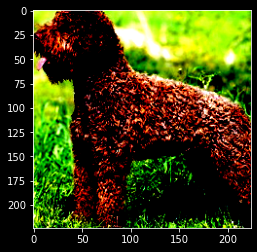

In [155]:
import matplotlib.pyplot as plt
model = squeezenet1_0(pretrained=True)
model.eval()

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
plt.imshow(input_tensor.permute(1, 2, 0))
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
probabilities = torch.nn.functional.softmax(output[0], dim=0)

From [here](https://gist.githubusercontent.com/maraoz/388eddec39d60c6d52d4/raw/791d5b370e4e31a4e9058d49005be4888ca98472/gistfile1.txt).

In [156]:
import json
with open('classes.txt') as f:
    data = f.read()

js = json.loads(data)
classes = list(js.values())

In [157]:
(vals,inds) = torch.topk(probabilities,k=5)
inds_list = [int(indi) for indi in inds]
top_k_classes = [classes[ind] for ind in inds_list]
print(top_k_classes)
print(vals)

['Irish water spaniel', 'miniature poodle', 'standard poodle', 'curly-coated retriever', 'Kerry blue terrier']
tensor([0.8127, 0.0679, 0.0643, 0.0252, 0.0238])


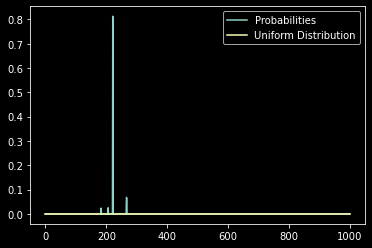

In [158]:
plt.plot(probabilities)
plt.plot([0,999],[1.0/1000]*2)
plt.legend(('Probabilities','Uniform Distribution'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['Irish water spaniel', 'miniature poodle', 'standard poodle', 'curly-coated retriever', 'Kerry blue terrier']
tensor([0.8127, 0.0679, 0.0643, 0.0252, 0.0238])


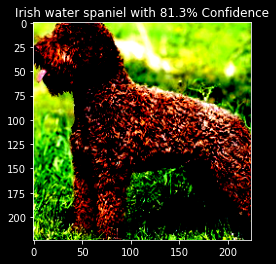

In [162]:
def get_readable_output(model, classes, filename):
    input_image = Image.open(filename)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    (vals,inds) = torch.topk(probabilities,k=5)
    inds_list = [int(indi) for indi in inds]
    top_k_classes = [classes[ind] for ind in inds_list]
    print(top_k_classes)
    print(vals)
    plt.figure()
    plt.imshow(input_tensor.permute(1, 2, 0))
    plt.title(f'{top_k_classes[0]} with {vals[0]*100:.1f}% Confidence')
    
filename = 'dog.jpg'
get_readable_output(model,classes,filename)

## Let's try and trick it. Let's use some weird animals.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['lion, king of beasts, Panthera leo', 'Tibetan mastiff', 'tiger, Panthera tigris', 'Leonberg', 'ox']
tensor([0.6559, 0.1581, 0.0467, 0.0289, 0.0219])
['tiger, Panthera tigris', 'tiger cat', 'lion, king of beasts, Panthera leo', 'tabby, tabby cat', 'Leonberg']
tensor([0.4830, 0.1646, 0.0611, 0.0361, 0.0244])


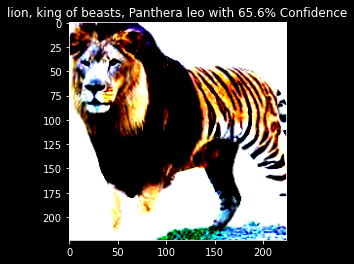

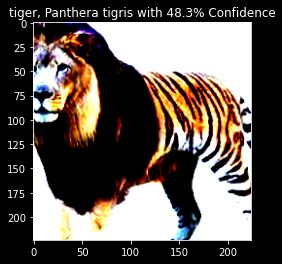

In [163]:
get_readable_output(model,classes,'liger.jfif')
get_readable_output(model,classes,'liger2.jfif')

In [165]:
get_readable_output('orc.jfif')

TypeError: get_readable_output() missing 2 required positional arguments: 'classes' and 'filename'